# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

import maddpg


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/mal/udacity_drl/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

### 4. Train the agents with DDPG

Run the code cell below to train the agent from scratch.  

Alternatively, you can skip to the next step below (**5. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 100	Average Score: 0.00000	Current Score: 0.0
Episode 200	Average Score: 0.00000	Current Score: 0.0
Episode 300	Average Score: 0.00000	Current Score: 0.0


/home/mal/udacity_drl/deep-reinforcement-learning/p3_collab-compet/udacity-drl-p3-collaboration/maddpg.py:138: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local1.parameters(), 1)
/home/mal/udacity_drl/deep-reinforcement-learning/p3_collab-compet/udacity-drl-p3-collaboration/maddpg.py:180: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local2.parameters(), 1)


Episode 400	Average Score: 0.00190	Current Score: 0.09000000171363354
Episode 500	Average Score: 0.02260	Current Score: 0.10000000149011612
Episode 600	Average Score: 0.02880	Current Score: 0.00000000149011612
Episode 700	Average Score: 0.01820	Current Score: 0.10000000149011612
Episode 800	Average Score: 0.06270	Current Score: 0.09000000171363354
Episode 900	Average Score: 0.10620	Current Score: 0.19000000320374966
Episode 1000	Average Score: 0.16690	Current Score: 0.10000000149011612
Episode 1100	Average Score: 0.19370	Current Score: 0.09000000171363354
Episode 1200	Average Score: 0.20690	Current Score: 0.10000000149011612
Episode 1300	Average Score: 0.16350	Current Score: 0.10000000149011612
Episode 1400	Average Score: 0.17180	Current Score: 0.19000000320374966
Episode 1500	Average Score: 0.18130	Current Score: 0.20000000298023224
Episode 1600	Average Score: 0.18420	Current Score: 0.10000000149011612
Episode 1700	Average Score: 0.21510	Current Score: 1.90000002831220632
Episode 1800

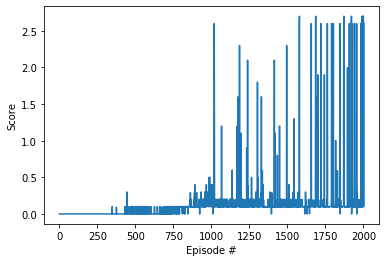

In [6]:
reload(maddpg)

from maddpg import MultiAgent

def multi_ddpg(n_episodes=2000, max_t=1000000, print_every=100, num_agents=1):
   
    agent = MultiAgent(state_size=24, action_size=2, random_seed=2)
    
    scores_deque = deque(maxlen=print_every)
    scores = []                                 # list containing average agent scores from each episode
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
         
        agent.reset()

        agents_scores = np.zeros(num_agents)                  # list containing the scores of each agent in the last episode
        for t in range(max_t):
            actions = np.zeros((num_agents,action_size))
            actions[0] = agent.act1(states[0])
            actions[1] = agent.act2(states[1])

            actions = np.clip(actions, -1, 1)   # all actions between -1 and 1
            env_info = env.step(actions)[brain_name] 
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            for i_agent in range(2):
                agent.add_to_memory(states[i_agent], actions[i_agent], rewards[i_agent], next_states[i_agent], dones[i_agent])

            if i_episode>300:
                for i in range(4):
                    agent.learn_from_replay()
            
            agents_scores += rewards                        # update the score (for each agent)
            states = next_states
            if np.any(dones):
                break
        score = np.max(agents_scores)
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.5f}\tCurrent Score: {}'.format(i_episode, np.mean(scores_deque), np.max(agents_scores)), end="")
        torch.save(agent.actor_local1.state_dict(), 'checkpoint_actor1.pth')
        torch.save(agent.critic_local1.state_dict(), 'checkpoint_critic1.pth')
        torch.save(agent.actor_local2.state_dict(), 'checkpoint_actor2.pth')
        torch.save(agent.critic_local2.state_dict(), 'checkpoint_critic2.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.10f}'.format(i_episode-100, np.mean(scores_deque)))
            break
    return scores

scores = multi_ddpg(n_episodes= 3000, num_agents= num_agents)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent trained by me!

In [12]:
from maddpg import MultiAgent

agent = MultiAgent(state_size=24, action_size=2, random_seed=2)


# load the weights from file
agent.actor_local1.load_state_dict(torch.load('trained_model_actor1.pth'))
agent.critic_local1.load_state_dict(torch.load('trained_model_critic1.pth'))
agent.actor_local2.load_state_dict(torch.load('trained_model_actor2.pth'))
agent.critic_local2.load_state_dict(torch.load('trained_model_critic2.pth'))


for i_episode in range(5):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
         
        agent.reset()

        agents_scores = np.zeros(num_agents)                  # list containing the scores of each agent in the last episode
        for t in range(500):
            actions = np.zeros((num_agents,action_size))
            actions[0] = agent.act1(states[0])
            actions[1] = agent.act2(states[1])

            actions = np.clip(actions, -1, 1)   # all actions between -1 and 1
            env_info = env.step(actions)[brain_name] 
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
                                    
            agents_scores += rewards                        # update the score (for each agent)
            states = next_states
            if np.any(dones):
                break

### 6. Watch Your Agent!

In the next code cell, you will load the trained weights from the training performed by you to watch the agent trained by you!

In [ ]:
from maddpg import MultiAgent

agent = MultiAgent(state_size=24, action_size=2, random_seed=2)


# load the weights from file
agent.actor_local1.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent.critic_local1.load_state_dict(torch.load('checkpoint_critic1.pth'))
agent.actor_local2.load_state_dict(torch.load('checkpoint_actor2.pth'))
agent.critic_local2.load_state_dict(torch.load('checkpoint_critic2.pth'))


for i_episode in range(5):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
         
        agent.reset()

        agents_scores = np.zeros(num_agents)                  # list containing the scores of each agent in the last episode
        for t in range(500):
            actions = np.zeros((num_agents,action_size))
            actions[0] = agent.act1(states[0])
            actions[1] = agent.act2(states[1])

            actions = np.clip(actions, -1, 1)   # all actions between -1 and 1
            env_info = env.step(actions)[brain_name] 
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
                                    
            agents_scores += rewards                        # update the score (for each agent)
            states = next_states
            if np.any(dones):
                break

### 7. Close the environment
When finished, you can close the environment.

In [ ]:
env.close()